In [1]:
import sys, os

sys.path.append("/cr/users/filip/bin/")

from utils.binaries import *
from utils.plotting import *

15:10:11 (  +17.9s) [INFO   ] -- import logging
15:10:11 (  +107ms) [INFO   ] -- import numpy as np
15:10:11 (   +10ms) [INFO   ] -- import uncertainties
15:10:11 (  +269ms) [INFO   ] -- import pandas as pd
15:10:11 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
15:10:11 (    +2ms) [INFO   ] -- import binaries.tools as tools
15:10:12 (  +329ms) [INFO   ] -- import matplotlib.pyplot as plt
15:10:12 (  +372ms) [INFO   ] -- import seaborn as so
15:10:12 (    +7ms) [DEBUG  ] -- font size set to 9.5
15:10:12 (    +1ms) [DEBUG  ] -- label size set to 13.0
15:10:12 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
15:10:12 (    +1ms) [DEBUG  ] -- markersize set to 2.0
15:10:12 (    +0ms) [DEBUG  ] -- usetex set to False
15:10:12 (    +1ms) [INFO   ] -- import plotting.tools as plot


In [2]:
heat_runs = pd.read_csv(
    "/cr/data01/filip/xy-calibration/config/calib_runlists/heat_runs_all.list", sep=";"
)

In [3]:
# selection cuts
heat_runs["comment"] = heat_runs["comment"].str.strip()
XY_runs_good = heat_runs[
    [
        comment != '"incomplete run, 1319 events"' and db == 1 and sphere != "KIT"
        for comment, db, sphere in zip(
            heat_runs["comment"], heat_runs["for_DB"], heat_runs["source"]
        )
    ]
]

In [4]:
XY_runs_good

,#runid,telescope,stepsize_cm,date,source,ledCurrent_mA,for_DB,jobfile,comment
2,04516x,he1,6,2019-11-26,OLO,15.9,1,job_HEAT_bay1-CZ_hex_s60_r0-1300_cut.txt,"""reversed positions"""
8,04530x,he3,6,2019-11-27,OLO,15.9,1,job_HEAT_bay3-CZ_hex_s60_r0-1300_cut.txt,"""reversed positions"""
11,04547x,he2,6,2019-11-27,OLO,15.9,1,job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt,"""reversed positions"""
16,05616x,he1,6,2022-10-21,"""OLO""",15.9,1,"""job_HEAT_bay1-CZ_hex_s60_r0-1300_cut.txt""",""""""
19,05621x,he2,6,2022-10-21,"""OLO""",15.9,1,"""job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt""",""""""
22,05626x,he3,6,2022-10-21,"""OLO""",15.9,1,"""job_HEAT_bay3-CZ_hex_s60_r0-1300_cut.txt""",""""""
31,6020x,he1,6,2023-10-13,"""OLO""",15.9,1,"""job_HEAT_bay1-CZ_hex_s60_r0-1300_cut.txt""",""""""
34,6025,he2,6,2023-10-13,"""OLO""",15.9,1,"""job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt""",""""""
40,6031x,he3,6,2023-10-14,"""OLO""",15.9,1,"""job_HEAT_bay3-CZ_hex_s60_r0-1300_cut.txt""",""""""
45,6066,he3,6,2023-11-09,"""OLO""",15.9,1,"""job_HEAT_bay3_hex_s60_r0-1300_cut.txt""",""""""


In [5]:
XY_measurements = {"he1": [], "he2": [], "he3": []}

for index, measurement in XY_runs_good.iterrows():

    (runid, telescope), date = measurement[:2], measurement["date"].strip()

    same_day = heat_runs[[d.strip() == date for d in heat_runs["date"]]]
    same_telescope = same_day[
        [t.strip() == telescope.strip() for t in same_day["telescope"]]
    ]

    year, month, day = date.split("-")

    XY_measurement = {
        "XY": measurement["#runid"],
        "CalA_closed_shutter": [None, None],
        "CalA_open_shutter": [None, None],
        "date": f"{year}{month}".replace("10", "oct").replace("11", "nov"),
    }

    # find Cal A closed shutter
    for candidate_index, candidate in same_telescope.iterrows():
        if candidate["comment"] == '"Cal A"':
            if candidate_index < index:
                XY_measurement["CalA_closed_shutter"][0] = candidate["#runid"]
            if candidate_index > index:
                XY_measurement["CalA_closed_shutter"][1] = candidate["#runid"]
        if candidate["comment"] == '"Cal A open shutter"':
            if candidate_index < index:
                XY_measurement["CalA_open_shutter"][0] = candidate["#runid"]
            if candidate_index > index:
                XY_measurement["CalA_open_shutter"][1] = candidate["#runid"]

    XY_measurements[telescope.strip()].append(XY_measurement)

In [6]:
import pickle

# save events to disk
with open("/cr/users/filip/Projects/XYScanner/all_heat_measurements.pickle", "wb") as f:
    pickle.dump(XY_measurements, f, pickle.HIGHEST_PROTOCOL)

15:27:37 (  +32.5s) [DEBUG  ] -- font size set to 9.5
15:27:37 (    +2ms) [DEBUG  ] -- label size set to 13.0
15:27:37 (    +1ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
15:27:37 (    +1ms) [DEBUG  ] -- markersize set to 2.0
15:27:37 (    +1ms) [DEBUG  ] -- usetex set to True


Drift in Cal A: open shutter
+-----+------------+------------+------------+
|     | 2022 oct   | 2023 oct   | 2023 nov   |
+=====+============+============+============+
| he1 | -0.340%    | -0.363%    | +0.287%    |
+-----+------------+------------+------------+
| he2 | +0.410%    | +0.196%    | -0.300%    |
+-----+------------+------------+------------+
| he3 | -0.002%    | -0.010%    | +0.097%    |
+-----+------------+------------+------------+

Drift in Cal A: closed shutter
+-----+------------+------------+------------+
|     | 2022 oct   | 2023 oct   | 2023 nov   |
+=====+============+============+============+
| he1 | -0.250%    | nan%       | +0.025%    |
+-----+------------+------------+------------+
| he2 | -0.128%    | nan%       | nan%       |
+-----+------------+------------+------------+
| he3 | -0.498%    | nan%       | +5.822%    |
+-----+------------+------------+------------+


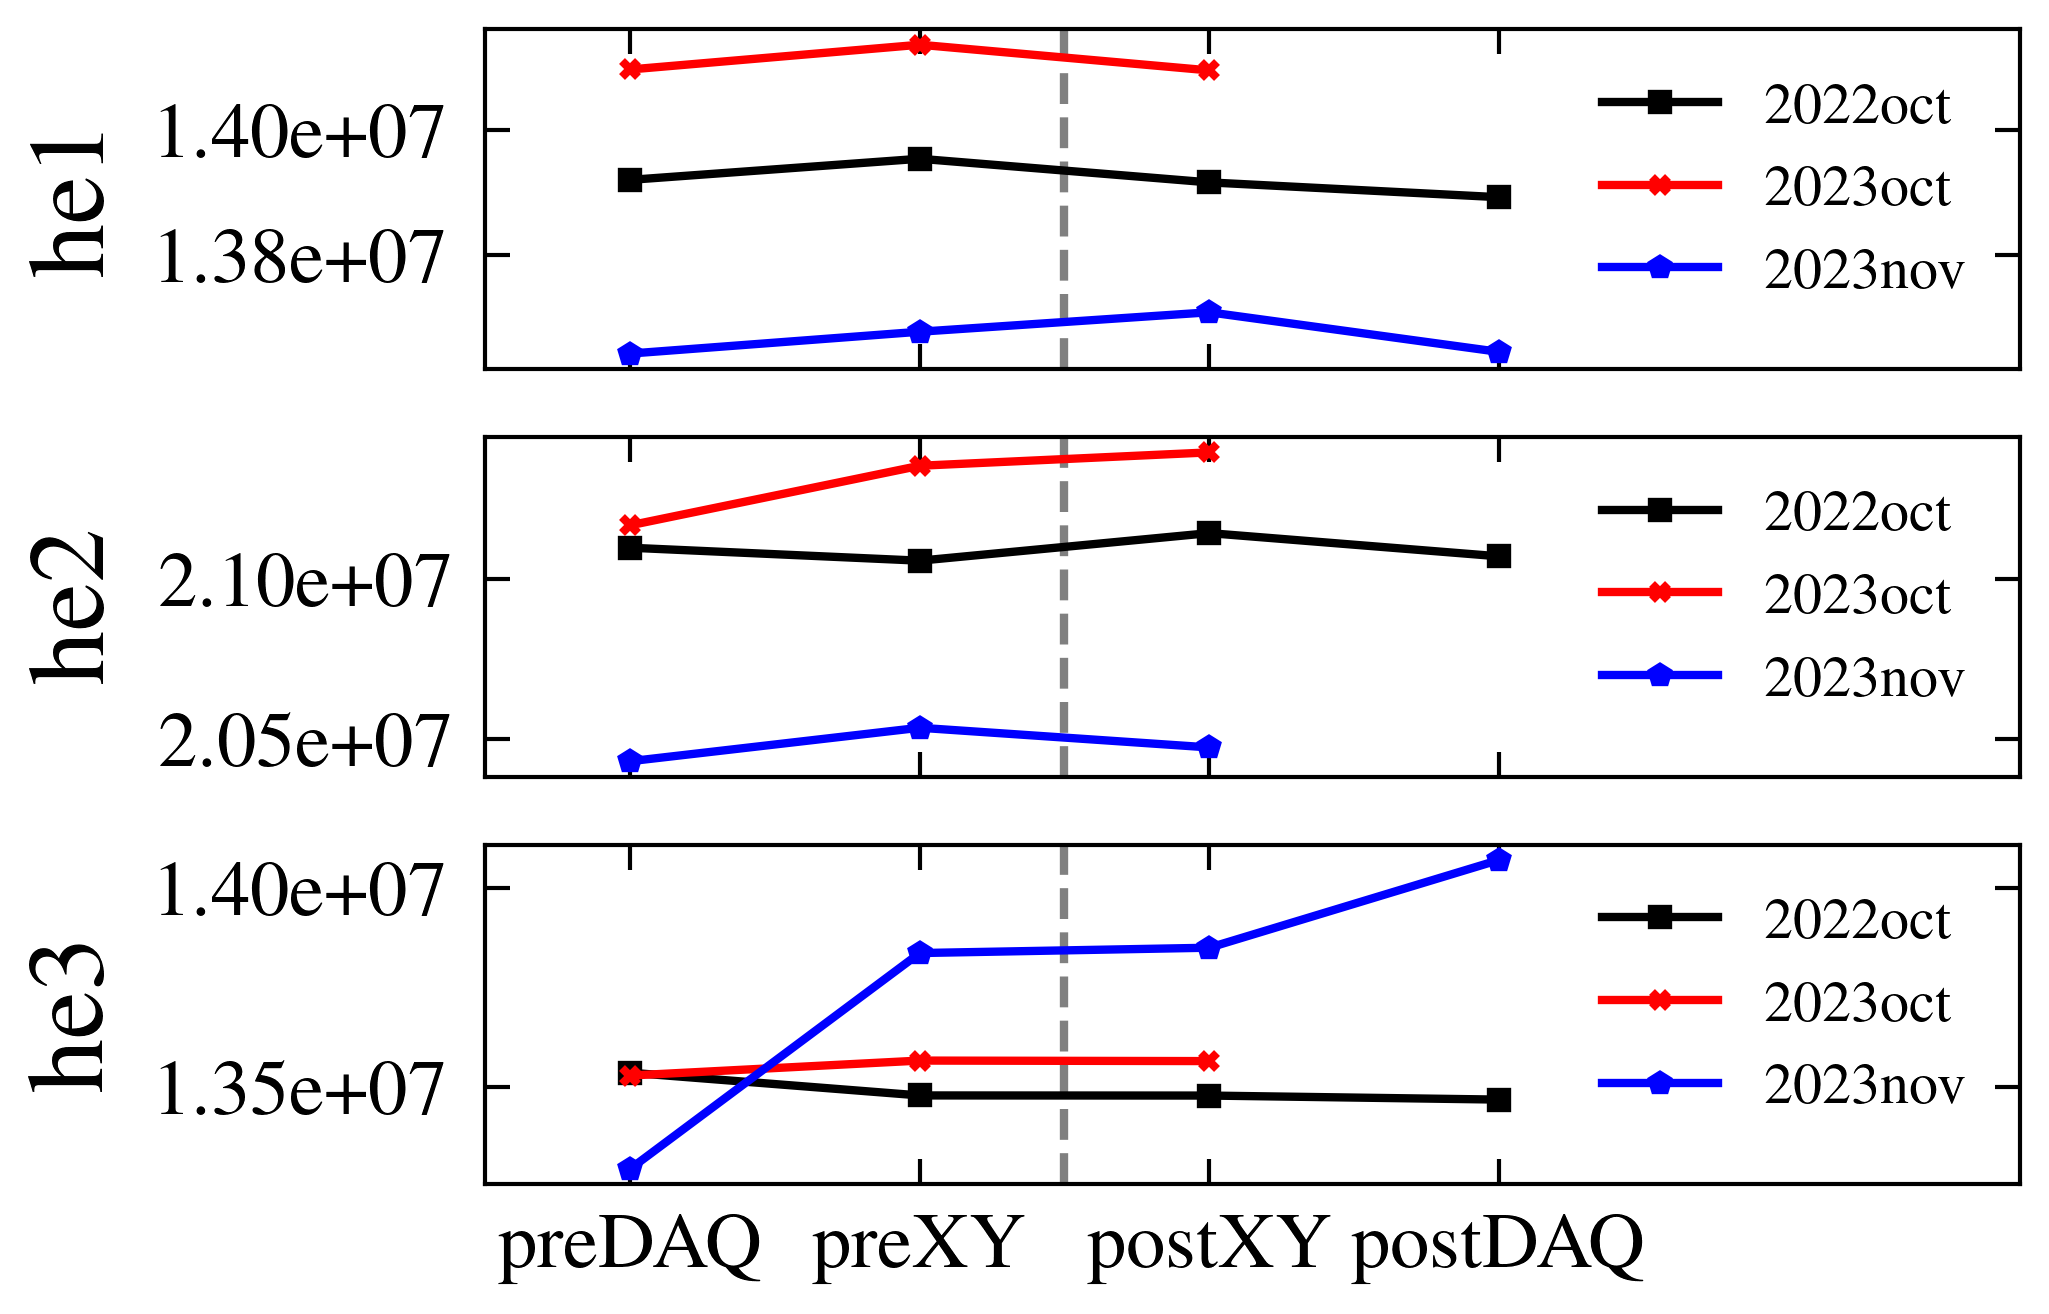

In [24]:
from tabulate import tabulate
from matplotlib.ticker import StrMethodFormatter

set_plt_style("double tex")
fig, axes = plt.subplots(3, 1, sharex=True)
data_directory = "/cr/data01/filip/xy-calibration/results"
fmt = ["o-", "s-", "x-", "p-", "v-"]
# fig.suptitle("Cal A - summed signal")

table_open_shutter = [["he1"], ["he2"], ["he3"]]
table_closed_shutter = [["he1"], ["he2"], ["he3"]]
for t, (ax, telescope) in enumerate(zip(axes, XY_measurements.keys())):

    ax.axvline(2.5, c="gray", ls="--")

    for i, measurement in enumerate(XY_measurements[telescope]):

        if measurement["date"] == "2019nov":
            continue
        x, y = [], []

        if measurement["CalA_closed_shutter"][0] is not None:
            pre_cal_a_closed_shutter = np.loadtxt(
                f"{data_directory}/out_{measurement['CalA_closed_shutter'][0]}.txt"
            )
            x.append(1), y.append(np.sum(pre_cal_a_closed_shutter[2]))

        if measurement["CalA_open_shutter"][0] is not None:
            pre_cal_a_open_shutter = np.loadtxt(
                f"{data_directory}/out_{measurement['CalA_open_shutter'][0]}.txt"
            )
            x.append(2), y.append(np.sum(pre_cal_a_open_shutter[2]))

        XY_measurement = ...

        if measurement["CalA_open_shutter"][1] is not None:
            post_cal_a_open_shutter = np.loadtxt(
                f"{data_directory}/out_{measurement['CalA_open_shutter'][1]}.txt"
            )
            x.append(3), y.append(np.sum(post_cal_a_open_shutter[2]))

        if measurement["CalA_closed_shutter"][1] is not None:
            post_cal_a_closed_shutter = np.loadtxt(
                f"{data_directory}/out_{measurement['CalA_closed_shutter'][1]}.txt"
            )
            x.append(4), y.append(np.sum(post_cal_a_closed_shutter[2]))

        ax.errorbar(x, y, label=measurement["date"], fmt=fmt[i])

        drift_open = (y[2] - y[1]) / y[1]
        try:
            drift_closed = (y[3] - y[0]) / y[0]
        except IndexError:
            drift_closed = np.nan

        table_open_shutter[t].append(
            ("+" if drift_open > 0 else "") + f"{drift_open * 100:.3f}%"
        )
        table_closed_shutter[t].append(
            ("+" if drift_closed > 0 else "") + f"{drift_closed * 100:.3f}%"
        )

    ax.set_xticks([1, 2, 2.5, 3, 4], ["preDAQ", "preXY", "", "postXY", "postDAQ"])
    ax.set_xlim(0.5, 5.8)
    ax.minorticks_off()
    ax.legend(fontsize=7)

    ax.set_ylabel(telescope)
    ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.2e}"))

cols = ["2022 oct", "2023 oct", "2023 nov"]
print("Drift in Cal A: open shutter")
print(tabulate(table_open_shutter, headers=cols, tablefmt="grid"))

print("\nDrift in Cal A: closed shutter")
print(tabulate(table_closed_shutter, headers=cols, tablefmt="grid"))

# plt.subplots_adjust(hspace=0.4)
fig.savefig("/cr/users/filip/plots/XY-heat/calAs.png")